In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

1-Dataset

In [21]:
np.random.seed(0) # pour toujours reproduire le meme dataset
x,y=make_regression(n_samples=100,n_features=1,noise=10)


observer data

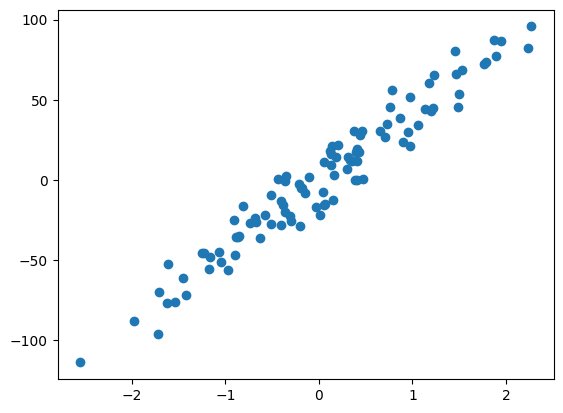

In [22]:
plt.scatter(x,y)

In [4]:
print(x.shape)
print(y.shape)
x

(100, 1)
(100,)


array([[ 0.01739446],
       [ 0.30446653],
       [-0.84197375],
       [-0.17602019],
       [ 0.69069949],
       [-0.54291691],
       [ 0.34728489],
       [-0.48321612],
       [ 0.52197119],
       [ 1.94078407],
       [ 0.52530082],
       [ 0.57205674],
       [-0.41995423],
       [-1.23682115],
       [-1.3349793 ],
       [-1.22751784],
       [-0.46190578],
       [ 0.23025461],
       [-0.67152648],
       [ 1.37400352],
       [-0.91958701],
       [ 1.23476333],
       [-0.61674912],
       [-0.14334992],
       [ 0.36929895],
       [ 0.36189807],
       [ 1.07789325],
       [ 1.10850669],
       [ 0.26602746],
       [-0.37452104],
       [-0.24384355],
       [ 0.67754436],
       [ 0.41351826],
       [ 0.85640646],
       [ 0.42133359],
       [-1.12626482],
       [-0.04925772],
       [-0.12296298],
       [-1.14675111],
       [-0.37056117],
       [ 2.32158681],
       [-2.76061917],
       [-2.23054227],
       [ 0.59298668],
       [ 0.62743959],
       [ 0

reshape y a cause manque de dimension

In [23]:
Y=y.reshape(y.shape[0],1)
Y

array([[-1.99558856e+01],
       [ 2.13397727e+01],
       [ 1.15568946e+01],
       [-1.63420692e+01],
       [-3.57006385e+01],
       [ 2.79953955e+01],
       [-5.63235304e+01],
       [ 1.76104141e+01],
       [ 2.14510620e+01],
       [-2.23528647e+01],
       [-2.74674636e+01],
       [ 9.30231368e+00],
       [-7.64902562e+01],
       [-2.83346523e+01],
       [ 3.06916745e+01],
       [ 6.04429895e+01],
       [-5.12662959e+00],
       [ 7.38599937e+01],
       [ 8.02758700e+01],
       [-2.38147640e+01],
       [ 5.17924631e+01],
       [ 7.74719877e+01],
       [ 2.65538141e-01],
       [ 1.41668399e+01],
       [ 4.51707474e+01],
       [ 5.57976548e+01],
       [ 8.68235998e+01],
       [ 1.25549501e+01],
       [ 2.65610251e+00],
       [ 6.85718935e+01],
       [-4.67284355e+01],
       [-2.19181505e+01],
       [-5.10544891e+01],
       [ 3.04769664e+01],
       [-2.17385589e+01],
       [ 3.07746441e+01],
       [ 2.13476276e+01],
       [-1.30570016e+01],
       [-1.5

ecrire X(vecteurs observations de x et 1 coller par hadtack)

In [25]:
X=np.hstack((x,np.ones(x.shape)))

In [26]:
X.shape
X

array([[-0.35955316,  1.        ],
       [ 0.97663904,  1.        ],
       [ 0.40234164,  1.        ],
       [-0.81314628,  1.        ],
       [-0.88778575,  1.        ],
       [ 0.44386323,  1.        ],
       [-0.97727788,  1.        ],
       [ 0.42833187,  1.        ],
       [ 0.20827498,  1.        ],
       [-0.31155253,  1.        ],
       [-0.51080514,  1.        ],
       [ 0.12691209,  1.        ],
       [-1.53624369,  1.        ],
       [-0.40178094,  1.        ],
       [ 0.6536186 ,  1.        ],
       [ 1.17877957,  1.        ],
       [-0.17992484,  1.        ],
       [ 1.78587049,  1.        ],
       [ 1.45427351,  1.        ],
       [-0.68481009,  1.        ],
       [ 0.97873798,  1.        ],
       [ 1.89588918,  1.        ],
       [-0.4380743 ,  1.        ],
       [ 0.3130677 ,  1.        ],
       [ 0.76103773,  1.        ],
       [ 0.77749036,  1.        ],
       [ 1.9507754 ,  1.        ],
       [ 0.33367433,  1.        ],
       [-0.34791215,

initialiser le vecteur de parametre aleatoire

In [27]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(2,1)
theta

array([[1.76405235],
       [0.40015721]])

2-Modele

In [28]:
def model(X,theta):
    return X.dot(theta)

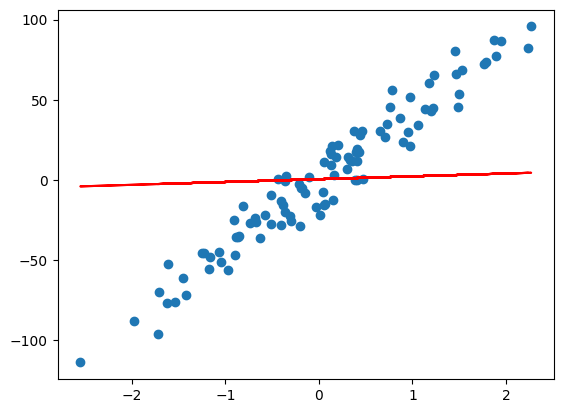

In [29]:
plt.scatter(x,Y)
plt.plot(x,model(X,theta),color='r')


3-Fonction cout

In [32]:
def cost_fonction(X,Y,theta):
    m=len(Y)
    return (1/(2*m))*np.sum((model(X,theta)-Y)**2)

In [33]:
#l'erreur
cost_fonction(X,Y,theta)

905.6306841935502

3-Dscent de gradient

In [34]:
def grad(X,y,theta):
    m=len(y)
    return (1/m)*X.T.dot(model(X,theta)-Y)

In [58]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    for i in range (0,n_iterations):
        theta=theta-learning_rate*grad(X,Y,theta)
        cost_history[i] = cost_fonction(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
    return theta, cost_history

In [59]:
grad(X,Y,theta)
gradient_descent(X,Y,theta,0.001,1000)

(array([[27.83301488],
        [ 0.52433628]]),
 array([903.90153664, 902.17592483, 900.4538415 , 898.73527941,
        897.02023135, 895.30869009, 893.60064846, 891.89609926,
        890.19503533, 888.49744952, 886.8033347 , 885.11268375,
        883.42548956, 881.74174503, 880.0614431 , 878.3845767 ,
        876.71113878, 875.0411223 , 873.37452026, 871.71132564,
        870.05153146, 868.39513074, 866.74211652, 865.09248185,
        863.4462198 , 861.80332345, 860.1637859 , 858.52760026,
        856.89475964, 855.2652572 , 853.63908608, 852.01623946,
        850.3967105 , 848.78049241, 847.16757839, 845.55796167,
        843.95163548, 842.34859308, 840.74882773, 839.1523327 ,
        837.5591013 , 835.96912682, 834.38240258, 832.79892193,
        831.2186782 , 829.64166476, 828.06787498, 826.49730225,
        824.92993997, 823.36578156, 821.80482045, 820.24705008,
        818.6924639 , 817.14105539, 815.59281802, 814.0477453 ,
        812.50583073, 810.96706784, 809.43145016, 807.89

4-Machine learning

In [60]:
theta_final,cost_history=gradient_descent(X,Y,theta,0.01,1000)
theta_final

array([[42.61765864],
       [-0.81309274]])

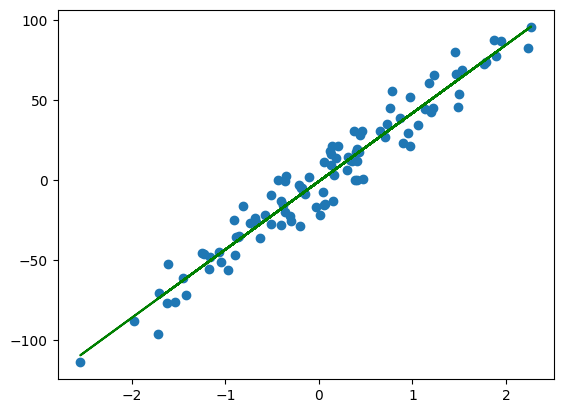

In [56]:
y_pred=model(X,theta_final)
plt.scatter(x,Y)
plt.plot(x,model(X,theta_final),color='g')

In [57]:
cost_fonction(X, Y, theta_final)

57.08574516158981

**Coure d'aprentissage**

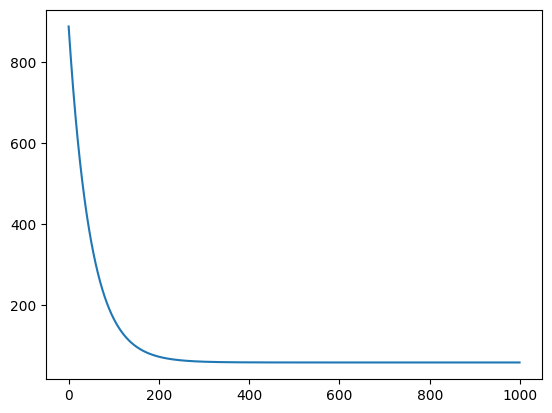

In [61]:
plt.plot(range(1000),cost_history)

**Evaluer le modele par R carre**

In [64]:
def coeif_determination(Y,y_pred):
  u=((Y-y_pred)**2).sum()
  v=((Y-(Y.mean()))**2).sum()
  return 1-u/v

In [65]:
coeif_determination(Y,y_pred)

0.9417294706504984